**Project: End-to-End Salary Prediction using Simple Linear Regression**

After learning and understanding the core concepts of **Simple Linear Regression (SLR)** — including model training, evaluation, and statistical analysis — we are now applying this knowledge to build a **real-world machine learning application**.

This project demonstrates:

- Training a regression model using a dataset of **Years of Experience vs Salary**
- Performing exploratory data analysis and statistical validation
- Saving the model using `pickle` for future use (backend)
- Creating a **Streamlit web app** that allows users to input experience and get instant salary predictions (frontend)

This is a complete **end-to-end ML pipeline**, bridging theory and practice, and simulating how data science is done in real-world industry projects.

**Note: Personal Workflow**

For machine learning and coding:

- I personally use **Spyder** or **VS Code** as my preferred environments.
- I keep all files in **one organized project folder** and work on them simultaneously.
- For **documentation, explanation, and step-by-step learning**, I use **Jupyter Notebook**.

This combination allows me to both experiment and maintain a clear, explainable project structure.



# Import Required Libraries
We need tools to handle data, create models, visualize, and compute statistics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import variation
import scipy.stats as stats
import pickle

# Load Dataset
Bring in the dataset (CSV format) that contains Years of Experience and Salary.


In [2]:
df = pd.read_csv(r"C:\Users\shali\Desktop\Nit Data Science\6_Month_DS_Road_Map_2025\8. Machine Learning\Regression\Salary_Prediction_App\Salary_Data.csv")

In [4]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
df.head(2)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205


# Explore Dataset
Understand data structure and ensure there are no missing values.


In [5]:
print("Columns:", df.columns)

Columns: Index(['YearsExperience', 'Salary'], dtype='object')


In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 YearsExperience    0
Salary             0
dtype: int64


# Separate Independent and Dependent Variables

- X = Input = Years of Experience (independent variable)
- Y = Output = Salary (dependent variable)

In [6]:
x = df.iloc[:, :-1]  # selects all columns except the last (features/input)
y = df.iloc[:, -1]   # selects the last column (typically your target/output)

# Train-Test Split
Split dataset into training and testing for model validation (80% train, 20% test).


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

# Train the Model
Create and train a Linear Regression model using the training data.


In [8]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

# Make Predictions
Use the trained model to predict salary values for the test set.


In [9]:
y_pred = regressor.predict(x_test)

In [10]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

# Compare Actual vs Predicted
To see how close the predicted salaries are to the actual ones.


In [11]:
comparison = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print("Actual vs Predicted:\n", comparison)

Actual vs Predicted:
     Actual        Predict
2    37731   40748.961841
28  122391  122699.622956
13   57081   64961.657170
10   63218   63099.142145
26  116969  115249.562855
24  109431  107799.502753


# Visualize the Results

- Red dots = Actual salaries from test set
- Blue line = Regression line from training predictions

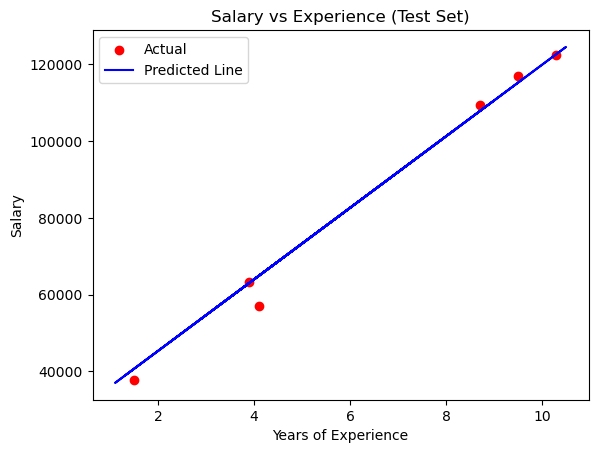

In [12]:
plt.scatter(x_test, y_test, color='red', label='Actual')
plt.plot(x_train, regressor.predict(x_train), color='blue', label='Predicted Line')
plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Predict for New Data
Estimate salary for someone with 12 and 20 years of experience using the regression equation.


In [13]:
m_slope = regressor.coef_
print("Slope (m):", m_slope)

Slope (m): [9312.57512673]


In [14]:
c_intercept = regressor.intercept_
print("Intercept (c):", c_intercept)

Intercept (c): 26780.099150628186


In [15]:
y_12 = (m_slope * 12) + c_intercept
print("Predicted Salary for 12 Years:", y_12)

Predicted Salary for 12 Years: [138531.00067138]


In [16]:
y_20 = (m_slope * 20) + c_intercept
print("Predicted Salary for 20 Years:", y_20)

Predicted Salary for 20 Years: [213031.60168521]


# Descriptive Statistics
Measure the center of the data.

- **Mean** = Average
- **Median** = Middle value
- **Mode** = Most frequent value

Example:

If mean salary = 65000, median = 62000, and mode = 60000, it suggests slight right skewed data.


In [18]:
print("Mean:\n", df.mean())

Mean:
 YearsExperience        5.313333
Salary             76003.000000
dtype: float64


In [19]:
print("Median:\n", df.median())

Median:
 YearsExperience        4.7
Salary             65237.0
dtype: float64


In [20]:
print("Mode:\n", df.mode())

Mode:
     YearsExperience  Salary
0               3.2   37731
1               4.0   39343
2               NaN   39891
3               NaN   43525
4               NaN   46205
5               NaN   54445
6               NaN   55794
7               NaN   56642
8               NaN   56957
9               NaN   57081
10              NaN   57189
11              NaN   60150
12              NaN   61111
13              NaN   63218
14              NaN   64445
15              NaN   66029
16              NaN   67938
17              NaN   81363
18              NaN   83088
19              NaN   91738
20              NaN   93940
21              NaN   98273
22              NaN  101302
23              NaN  105582
24              NaN  109431
25              NaN  112635
26              NaN  113812
27              NaN  116969
28              NaN  121872
29              NaN  122391


Mode returns the most frequent value(s), but in this case:

- Many salary values occurred only once.
- That’s why `.mode()` returns a long list.
- There’s no dominant salary value repeating significantly.

# Variance and Standard Deviation

Measure how spread out the data is.
- High variance/standard deviation means large spread.

Example:

- Salary std dev = 7000 → salaries are close together
- Salary std dev = 25000 → salaries are very spread

In [21]:
print("Variance:\n", df.var())

Variance:
 YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64


In [22]:
print("Standard Deviation:\n", df.std())

Standard Deviation:
 YearsExperience        2.837888
Salary             27414.429785
dtype: float64


# Coefficient of Variation (CV)

It’s a normalized measure of dispersion — useful for comparing variability across datasets with different units.

**Formula:** CV = std dev / mean

**Example Interpretation:**

- If CV for salary = 0.35 (35%) → moderately spread salaries
- If CV for experience = 0.12 (12%) → less variability in experience
- If CV > 1 → very high variation relative to average (e.g., unstable salaries or outliers)

**Use Case:** Comparing stock prices or salary vs experience even if their units differ.


In [23]:
print("Coefficient of Variation (all columns):\n", variation(df.values))

Coefficient of Variation (all columns):
 [0.5251297  0.35463929]


In [24]:
print("CV for Salary:\n", variation(df['Salary'].values))

CV for Salary:
 0.3546392938275572


# Correlation
Check how strongly related two variables are.

**Example Interpretation:**

- Correlation ≈ 1 → strong positive relationship (more experience → more salary)
- Correlation ≈ 0 → no relationship
- Correlation ≈ -1 → inverse relationship


In [25]:
print("Correlation Matrix:\n", df.corr())

Correlation Matrix:
                  YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


In [26]:
print("Salary vs Experience Correlation:", df['Salary'].corr(df['YearsExperience']))

Salary vs Experience Correlation: 0.9782416184887598


# Skewness
Skewness tells us about the shape and symmetry of data distribution.

**Interpretation:**

- Skewness = 0 → perfectly symmetric (normal)
- Skewness > 0 → positively skewed (long right tail)
- Skewness < 0 → negatively skewed (long left tail)

**Example:**
- Salary Skewness = 0.35 → slightly positively skewed → a few high salaries

In [27]:
print("Skewness:\n", df.skew())

Skewness:
 YearsExperience    0.37956
Salary             0.35412
dtype: float64


In [28]:
print("Salary Skewness:", df['Salary'].skew())

Salary Skewness: 0.35411967922959153


# Standard Error of Mean (SEM)
SEM estimates how much the sample mean might differ from the population mean

**Formula:** SEM = Standard Deviation / √n

**Example:**

- SEM of salary = 5000 → your sample mean might be ±₹5000 from true mean

**Interpretation Table:**

| SEM % of Mean     | Meaning                          |
|-------------------|----------------------------------|
| Less than 5%      | Very reliable sample mean        |
| Between 5% – 10%  | Moderately stable                |
| Greater than 10%  | Unstable / less reliable         |



In [29]:
print("SEM (all columns):\n", df.sem())

SEM (all columns):
 YearsExperience       0.518125
Salary             5005.167198
dtype: float64


In [30]:
print("SEM of Salary:", df['Salary'].sem())

SEM of Salary: 5005.167198052405


# Z-Score Normalization
To standardize data — Z-scores convert values into the number of standard deviations away from the mean. Useful for comparing across variables or preparing for ML models.

**Formula:**
$$
Z = \frac{X - \mu}{\sigma}
$$

Where:

- X = individual value
- μ = mean
- σ = standard deviation

**Example:**

- Z-score of 0 = exactly at mean
- Z-score of +2 = 2 std devs above mean
- Z-score of -1.5 = 1.5 std devs below mean


In [31]:
print("Z-scores (all columns):\n", df.apply(stats.zscore))

Z-scores (all columns):
     YearsExperience    Salary
0         -1.510053 -1.360113
1         -1.438373 -1.105527
2         -1.366693 -1.419919
3         -1.187494 -1.204957
4         -1.115814 -1.339781
5         -0.864935 -0.718307
6         -0.829096 -0.588158
7         -0.757416 -0.799817
8         -0.757416 -0.428810
9         -0.578216 -0.698013
10        -0.506537 -0.474333
11        -0.470697 -0.749769
12        -0.470697 -0.706620
13        -0.434857 -0.702020
14        -0.291498 -0.552504
15        -0.148138 -0.299217
16        -0.076458 -0.370043
17        -0.004779  0.262859
18         0.210261  0.198860
19         0.246100  0.665476
20         0.532819  0.583780
21         0.640339  0.826233
22         0.927058  0.938611
23         1.034577  1.402741
24         1.213777  1.240203
25         1.321296  1.097402
26         1.500496  1.519868
27         1.536336  1.359074
28         1.787215  1.721028
29         1.858894  1.701773


In [32]:
print("Z-score of Salary:\n", stats.zscore(df['Salary']))

Z-score of Salary:
 [-1.36011263 -1.10552744 -1.419919   -1.20495739 -1.33978143 -0.71830716
 -0.58815781 -0.79981746 -0.42881019 -0.69801306 -0.47433279 -0.74976858
 -0.70662043 -0.70201994 -0.55250402 -0.29921736 -0.37004264  0.26285865
  0.19885989  0.66547573  0.58377993  0.82623317  0.93861127  1.40274136
  1.24020308  1.09740238  1.51986835  1.3590738   1.72102849  1.70177321]


# Degrees of Freedom
Used in many statistical formulas. Degrees of freedom = number of values that are free to vary when calculating a statistic.

**Formula:**
$$
\text{DF} = n - k
$$

Where:

- n = number of observations
- k = number of parameters or variables

**Example:**

- If there are 30 rows and 2 columns → DF = 28

In [33]:
a = df.shape[0]  # number of rows
b = df.shape[1]  # number of columns
degree_of_freedom = a - b
print("Degrees of Freedom:", degree_of_freedom)

Degrees of Freedom: 28


# SSR, SSE, SST + R² Score
hese metrics evaluate regression model performance:

- **SSR (Regression)**: Explained variation
- **SSE (Error)**: Unexplained variation
- **SST (Total)**: Total variation
- **R² Score**: Proportion of variance explained by model

**Formula:**
$$
[ SST = SSR + SSE \quad\text{and}\quad R^2 = 1 - \frac{SSE}{SST} ]
$$

**Example:**

- High SSR & low SSE = good model
- R² close to 1 = excellent fit

In [34]:
y_mean = np.mean(y)

In [35]:
SSR = np.sum((y_pred - y_mean) ** 2)
print("SSR (Sum of Squares for Regression):", SSR)

SSR (Sum of Squares for Regression): 6263152884.284127


In [36]:
y = y[0:6]  # match length with test set for SSE
SSE = np.sum((y - y_pred) ** 2)
print("SSE (Sum of Squares for Error):", SSE)

SSE (Sum of Squares for Error): 15274062883.9432


In [37]:
SST = SSR + SSE
print("SST (Total Sum of Squares):", SST)

SST (Total Sum of Squares): 21537215768.227325


In [38]:
r_square = 1 - (SSR / SST)
print("R-squared Value:", r_square)

R-squared Value: 0.7091939389155485


# Check for Overfitting/Underfitting
To evaluate model performance on training vs testing data.

**Example:**

- If Train Score ≈ Test Score → good generalization 
- If Train Score >> Test Score → overfitting 
- If both scores are low → underfitting 


In [39]:
bias = regressor.score(x_train, y_train)
print("Training Score (Bias):", bias)

Training Score (Bias): 0.9411949620562126


In [40]:
variance = regressor.score(x_test, y_test)
print("Testing Score (Variance):", variance)

Testing Score (Variance): 0.988169515729126


# Mean Squared Error (MSE)

MSE measures average squared difference between predicted and actual values. Lower is better.

**Example:**

- MSE = 1000 → predictions are fairly close
- MSE = 30000 → predictions have large error

In [41]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, regressor.predict(x_train))
test_mse = mean_squared_error(y_test, y_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 36149670.11816131
Test MSE: 12823412.298126562


**What is Pickle in Python?**

**Pickle** is a module in Python used for **saving objects to disk** and **loading them back later** — it's like "freezing" your trained model so you don’t have to train it again.

- Pickle stores the object in a **binary format**.
- The saved file usually has a `.pkl` extension.
- This is useful when you want to deploy your model or use it in other scripts without retraining.

**Use Case in Machine Learning:**
After training a model, saving it lets you reuse it for predictions, web apps, dashboards, etc.

**Typical size:** For simple models like Linear Regression, the file size is small (e.g., 3–10 KB). For complex models like Random Forests or Neural Networks, `.pkl` files can be 10s or 100s of MB.


# Save Model Using Pickle
To save your trained model and reuse it later without retraining.


In [42]:
filename = 'Linear_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(regressor, file)

print("Model has been saved as 'Linear_regression_model.pkl'")

Model has been saved as 'Linear_regression_model.pkl'


# Confirm Save Location
Just to confirm where your file is stored.


In [44]:
import os
print("Saved in directory:", os.getcwd())

Saved in directory: C:\Users\Lenovo\OneDrive\Desktop\Python Everyday work\Github work


---

# **Deploy Your Model with Streamlit Web App**

You can create a **fully functional web app** using **Streamlit** to interact with your saved `.pkl` model and predict salary dynamically.

## How to Set Up Your Streamlit App

## Create a New Python File
- Open **VS Code**, **Jupyter**, or any text editor
- Paste the code below
- Save it as `SLR_app1.py` # Any name with .py

## Full Code with Explanations

```python
import streamlit as st
import pickle
import numpy as np

# Load the trained regression model
model = pickle.load(open(
    r'd:\Full stack Data Science course\VS Code\ML\Regression\Simple Linear Regresaion\linear_regression_model.pkl',
    'rb'))

# App Title and Subtitle
st.markdown("<h1 style='color:#ff4b4b;'>💼 Salary Prediction App</h1>", unsafe_allow_html=True)
st.markdown("🚀 Predict salary based on years of experience using a pre-trained **Simple Linear Regression** model.", unsafe_allow_html=True)
st.markdown("---")

#  Input field for user to enter years of experience
st.markdown("### 📥 Enter Your Experience:")
years_experience = st.number_input("Years of Experience", min_value=0.0, max_value=50.0, value=1.0, step=0.5)

# Predict salary when button is clicked
if st.button("📊 Predict Salary"):
    experience_input = np.array([[years_experience]])  # model expects 2D array
    prediction = model.predict(experience_input)
    st.markdown(f"<h3 style='color:green;'>💰 Predicted Salary: ₹{prediction[0]:,.2f}</h3>", unsafe_allow_html=True)

#  Show model details
st.markdown("---")
st.markdown(" **Model Details:**")
st.markdown("- Trained on salary vs years of experience dataset")
st.markdown("- Uses a Simple Linear Regression algorithm")
st.markdown("- Predicts continuous salary outcomes based on your input")

# 🎨 Footer
st.markdown("<hr style='border: 1px solid #bbb;'>", unsafe_allow_html=True)
st.markdown("<p style='text-align:center; color:gray;'>Made with ❤️ using Streamlit</p>", unsafe_allow_html=True)
```


## Run Your App Using Terminal or CMD

## Open Command Prompt or Terminal:
```bash
cd "D:\Full stack Data Science course\VS Code\ML\Regression\Simple Linear Regresaion"
```

## Run your app:
```bash
streamlit run SLR_app1.py
```

> Make sure `streamlit` is installed:
```bash
pip install streamlit
```


## Output
- A browser window opens at `http://localhost:8501`
- You can enter experience and click **Predict Salary** to get results.



##  (Optional) Create a requirements.txt File
If you want to deploy or share your app with someone:

```txt
streamlit
scikit-learn
pandas
numpy
```

Save it as `requirements.txt` and install all packages using:
```bash
pip install -r requirements.txt
```

Now you have a complete Machine Learning model **with a working web interface!** 

# Project Conclusion
## Project Wrap-up: What We Achieved

In this end-to-end ML mini-project, we:

- Explored and cleaned the dataset  
- Performed detailed **statistical analysis** (mean, median, mode, SEM, skewness, correlation, etc.)  
- Built and evaluated a **Simple Linear Regression model**  
- Saved the model using **Pickle** for reusability  
- Developed a **Streamlit frontend web app** for live salary prediction



## Key Takeaways:

- Machine learning is not just about training models — it's about understanding data, validating results, and making models **usable**.
- Tools like **Pickle** and **Streamlit** help take your model from your notebook to a **real-world interactive product**.
- Even a basic algorithm like SLR can become powerful when connected to the right pipeline.



## Next Steps:

- Try using a larger, more complex dataset  
- Experiment with **multiple features** (like Education, Age, Skill Level)  
- Replace SLR with more advanced models (Random Forest, XGBoost, etc.)  
- Host the Streamlit app on **Streamlit Cloud or Hugging Face Spaces** for free!



Thanks for following along! 
Let’s continue building smarter tools with data!
